### Part 1 - ETL

### 1. Import Pandas

In [17]:
import pandas as pd
pd.__version__

'1.4.3'

### 2. Load the csv

In [18]:
df = pd.read_csv("houserent.csv")

**Preview the dataframe** 


In [19]:
df.head(5)

# Later drop these columns
#Posted On, Point of contact

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [20]:
df.shape

(4746, 12)

In [21]:
cols = df.columns
cols

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [22]:
df.info()

# Mindful of type "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


### Part II - EDA
- Use describe()
- Plot countplot, displot, scatterplot, boxplot
- Which features are promising to predict rent
- Try to use masking
- Try `df['City'].value_counts()`
- Try `.unique()`
- Try sns.pairplot(df) ; This will all possible plots, but take time
- ...
- Drop rows with abnormal values 
    - df.drop([indexes], axis=0, inplace=True)
    - axis = 0 means row; axis = 1 means columns
    - e.g. indexes = [5, 33, 22] - use masking to find these values

In [23]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [24]:
import seaborn as sns

In [39]:
df['BHK'].unique()

array([2, 1, 3, 6, 4, 5])

In [40]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [41]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [42]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [43]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [44]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [45]:
df['Bathroom'].unique()

array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

In [116]:
#4. scatterplot is to plot continuous x_1 vs. continuous x_2/y
#hue MUST be a discrete variable
import matplotlib.pyplot as plt

In [117]:
# Note1 - Rent too high delete those rows

### 2.1 Univariate analysis
- One var. at a time
- countplot - discreate
- distplot - continuous
- Why countplot? 
- We want to understand the dehaviour
- We want to check for abnormal vals.

In [118]:
df['BHK'].unique()

array([2, 1, 3, 6, 4, 5])

/root/projects/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BHK', ylabel='count'>

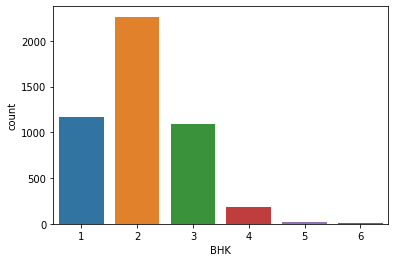

In [119]:
sns.countplot(df['BHK'])

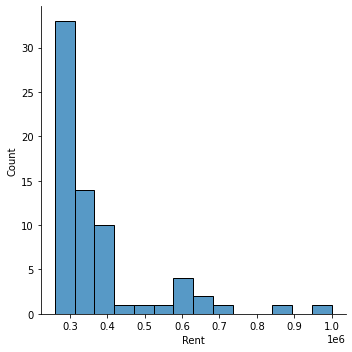

In [121]:
# Rent plot
#Cont. or descrete? -> continuous -> displot
#sns.displot(df['Rent'])

#Decided to cut 2.5
#Use masking

cond1 = df['Rent'] > 250000
sns.displot(df.Rent[cond1])

In [122]:
# We come to the 

In [123]:
import numpy as np

np.where(df['Rent'] > 1000000)

(array([], dtype=int64),)

In [124]:
df.iloc[1001]

Posted On                  2022-04-29
BHK                                 1
Rent                            25000
Size                              596
Floor                      1 out of 7
Area Type                  Super Area
Area Locality          Kandivali West
City                           Mumbai
Furnishing Status      Semi-Furnished
Tenant Preferred     Bachelors/Family
Bathroom                          1.0
Point of Contact        Contact Owner
cat_size                            2
Name: 1002, dtype: object

In [125]:
df.iloc[1837]

Posted On                  2022-06-04
BHK                                 2
Rent                            16000
Size                             1100
Floor                      2 out of 4
Area Type                  Super Area
Area Locality        Padmanabha Nagar
City                        Bangalore
Furnishing Status      Semi-Furnished
Tenant Preferred     Bachelors/Family
Bathroom                          2.0
Point of Contact        Contact Owner
cat_size                            2
Name: 1839, dtype: object

In [86]:
# Deleting
df.drop([1001, 1837], axis=0, inplace=True)

In [126]:
np.where(df['Rent'] > 1000000)

(array([], dtype=int64),)

### 2.2 Multivariate analysis
- two feature/labels at the same time
- Eg. how bathrooms affect Rent
- Usually y- label, x- feature
- Use boxplot - Discrete vs. cont.
- Use scatterplot - cont. vs cont.

In [127]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'cat_size'],
      dtype='object')

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

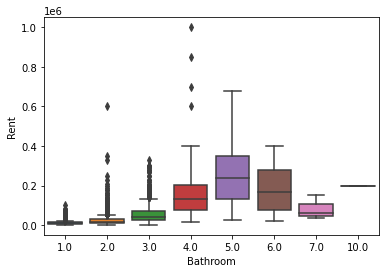

In [128]:
# Bathroom(discrete) related to Rent(cont.) - boxplot
sns.boxplot(x=df['Bathroom'], y=df['Rent'])

# Are they related? 
# Note2 - Bathroom is a good feature

In [129]:
df['City'].value_counts()

Mumbai       971
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Rent'>

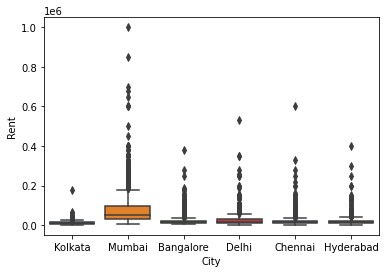

In [130]:
#City affects rent?
# City - discreate -> boxplot

sns.boxplot(x=df['City'], y=df['Rent'])


In [131]:
# To use the City as a feature use Mumbai and Non-Mumbai

In [132]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'cat_size'],
      dtype='object')

<AxesSubplot:xlabel='Size', ylabel='Rent'>

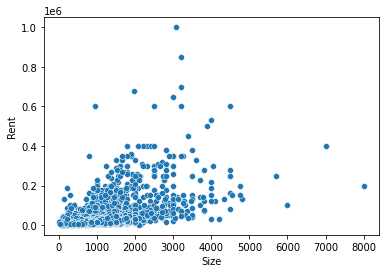

In [133]:
# Size affects rent
# Size - cont. vs Rent- cont.
# Scatterplot
sns.scatterplot(x = df['Size'], y=df['Rent'])

<AxesSubplot:xlabel='Size', ylabel='Rent'>

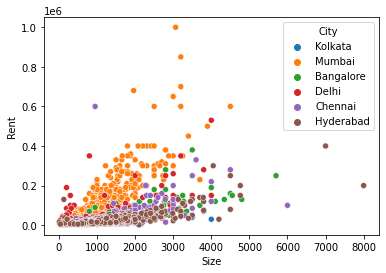

In [134]:
sns.scatterplot(x = df['Size'], y = df['Rent'], hue= df['City'])


<AxesSubplot:>

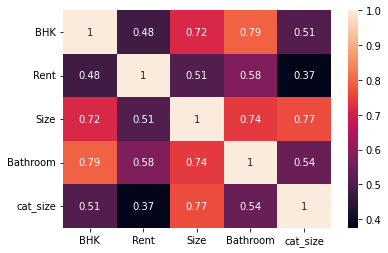

In [135]:
#Since this is tricky - try heatmap

sns.heatmap(df.corr(), annot=True)

In [ ]:
# Special Tip
# Between features themselves - be carefull - two cols. carring same info.
# Ex. height in inches and height in cm
# Features must not have high correlation - cos assumed to be independent

In [ ]:
# Summary - size, bathroom, bhk
# But still not comprehensively look at data

In [ ]:
# Lets create new col called categorical_size
# 1- small, 2 - medium, 3 - big

In [136]:
df['Size'].mean(), df['Size'].median(), df['Size'].std()

(966.3176644182125, 850.0, 631.2346642955634)

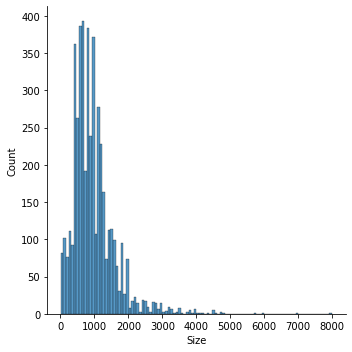

In [137]:
sns.displot(df['Size'])

In [138]:
df['Size'].mean(), df['Size'].median(), df['Size'].std()

(966.3176644182125, 850.0, 631.2346642955634)

In [139]:
firstpivot = df['Size'].median() - df['Size'].std() #median cos. not normal
firstpivot

218.76533570443655

In [140]:
secondpivot = df['Size'].median() + df['Size'].std() #median cos. not normal
secondpivot

1481.2346642955636

In [141]:
# G1 - < 218.7653
cond1 = df.Size < firstpivot # List of True, False, can use to select index

# G2 218.7653 to 1481.2346
cond2  = (df.Size >= firstpivot) & (df.Size <= secondpivot)

# G3 > 1481.2346
cond3 = df.Size > secondpivot

In [142]:
#Set all rows with cond1 - to 1, cond2 - 2, cond3 - 3
#format df.col[cond1] = 1

df['cat_size'] = 1 # Set everything to 1

In [147]:
#df.cat_size[cond1] = 1
#df.cat_size[cond2] = 2
#df.cat_size[cond3] = 3

df.loc[cond1, 'cat_size'] = 1
df.loc[cond2, 'cat_size'] = 2
df.loc[cond3, 'cat_size'] = 3

In [148]:
df.cat_size.unique()

array([2, 3, 1])

<AxesSubplot:xlabel='cat_size', ylabel='Rent'>

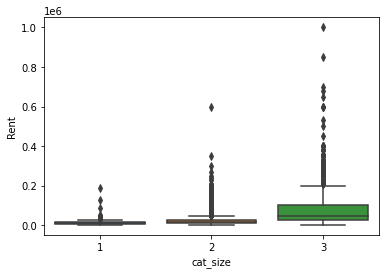

In [149]:
# cat_size(discrete) affect Rent(cont)?
sns.boxplot(x = df['cat_size'], y=df['Rent'])

#Feature engineering
# More categories  - More clear pattern

In [145]:
# Conclusion - EDA

# Remove rent outliers
# Bathroom is a promising feature
# We learn how to group - feature engineering

### Part III - Feature extraction and selection
- you have to now select your X and y
- once you select, please do train_test_split

- Note: the reason why I do feature extraction before preprocessing, is to prevent data leakage



In [155]:
X = df[['Size', 'Bathroom', 'BHK']]
print(X.shape)
assert X.shape[0] > 0
assert X.shape[1] > 0

(4744, 3)


In [157]:
y = df['Rent']
assert y.shape[0] > 0
assert y.ndim == 1
#For y shpe is (n,)

In [151]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=999 )

In [159]:
# Some assertion testing
assert X_train.shape[0] == int(X.shape[0] * 0.7)

In [160]:
# Ensure no "Object data type"
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4292 to 4446
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      3320 non-null   int64  
 1   Bathroom  3316 non-null   float64
 2   BHK       3320 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 103.8 KB


In [161]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3320 entries, 4292 to 4446
Series name: Rent
Non-Null Count  Dtype
--------------  -----
3320 non-null   int64
dtypes: int64(1)
memory usage: 51.9 KB


### Part IV - Cleaning / Preprocessing
- This is always done after splitting - stop data leakage
1. Fill the missing vals.
2. Standadize the data

- Two ways
1. Fill - standardize
2. standardize - Fill - standardize - If you do this first mean will be 0
    - No point with filling with 0

- THE ONLY CORRECT WAY IS TO Fill - standardize

--> If you fill with mean 1,2 methods are the same

--> Fill with median() it is beat to 1. Fill - standardize

In [170]:
X_train.isna().sum()

Size        0
Bathroom    4
BHK         0
dtype: int64

In [173]:
X_test.isna().sum()

Size        0
Bathroom    3
BHK         0
dtype: int64

In [174]:
y_train.isna().sum()

0

In [175]:
y_test.isna().sum()

0

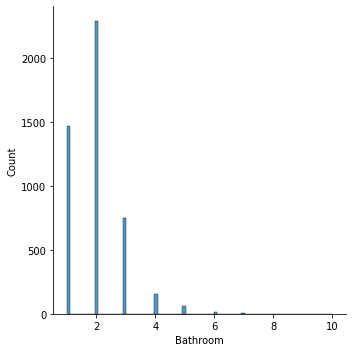

Bathroom - mean: 1.9666455562592358, median: 2.0 


In [169]:
#1. Plot bathroom
ns.displot(df.Bathroom)
plt.show()

mean_bathroom = df['Bathroom'].mean()
median_bathroom = df['Bathroom'].median()
print(f"Bathroom - mean: {mean_bathroom}, median: {median_bathroom} ")

In [177]:
#1. Plot bathroom
X_train['Bathroom'].value_counts()

2.0     1626
1.0     1025
3.0      500
4.0      110
5.0       44
6.0        9
10.0       1
7.0        1
Name: Bathroom, dtype: int64

In [178]:
X_train['Bathroom'].fillna(2.0, inplace=True)

In [ ]:
#bathroom_median = df['Bathroom'].median()
#df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
#df['Bathroom'].isna().sum()

In [179]:
X_train.isna().sum()

Size        0
Bathroom    0
BHK         0
dtype: int64

In [180]:
X_test['Bathroom'].fillna(2.0, inplace=True)

In [181]:
X_test.isna().sum()

Size        0
Bathroom    0
BHK         0
dtype: int64

### 4.2 Standardization

In [182]:
from sklearn.preprocessing import StandardScaler

In [184]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)


In [185]:
X_test = sc.transform(X_test)

In [187]:
X_train.mean(), X_train.std()

(-3.888009949691311e-17, 1.0)

In [188]:
X_test.mean(), X_test.std()

(0.026452571992511626, 1.0043356270187282)